# **Salifort Motors HR Analysis: Providing data-driven suggestions for HR**

### A Google Advanced Data Analytics Capstone Project

***

## Case Study Scenario

You are a data professional working for Salifort Motors. 

Currently, there is a high rate of turnover among Salifort employees. (Note: In this context, turnover data includes both employees who choose to quit their job and employees who are let go). Salifort’s senior leadership team is concerned about how many employees are leaving the company. Salifort strives to create a corporate culture that supports employee success and professional development. Further, the high turnover rate is costly in the financial sense. Salifort makes a big investment in recruiting, training, and upskilling its employees. 

If Salifort could predict whether an employee will leave the company, and discover the reasons behind their departure, they could better understand the problem and develop a solution. 

As a first step, the leadership team asks Human Resources to survey a sample of employees to learn more about what might be driving turnover.  

Next, the leadership team asks you to analyze the survey data and come up with ideas for how to increase employee retention. To help with this, they suggest you design a model that predicts whether an employee will leave the company based on their job title, department, number of projects, average monthly hours, and any other relevant data points. A good model will help the company increase retention and job satisfaction for current employees, and save money and time training new employees. 

As a specialist in data analysis, the leadership team leaves it up to you to choose an approach for building the most effective model to predict employee departure. For example, you could build and evaluate a statistical model such as logistic regression. Or, you could build and evaluate machine learning models such as decision tree, random forest, and XGBoost. Or, you could choose to deploy both statistical and machine learning models. 

For any approach, you’ll need to analyze the key factors driving employee turnover, build an effective model, and share recommendations for next steps with the leadership team. 


***

### Table of Contents
#### *P*ACE: Plan
1. Data Acquisition
2. Data Cleaning and Pre-processing

#### P*A*CE: Analyze 
1. Exploratory Data Analysis

#### PA*C*E: Construct 
1. Logistic Regression Model
2. Tree-Based Machine Learning Model

#### PAC*E*: Execute 
1. Evaluation and Selection of Models
2. Recommendations and Conclusion

***

## *P*ace: Plan

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They have collected data from employees and would like us to provide data-driven suggestions based on our understanding of the data. They have the following question: *what’s likely to make the employee leave the company?*

Our goals in this project are to: 
1. analyze the data collected by the HR department and 
2. build a model that predicts whether or not an employee will leave the company.

If we can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that we will be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### A project summary

First, let's examine the stakeholders for this project:
- The HR department of Salifort Motors - The HR department has the biggest stake in this project. They are the most interested in this project as being able to predict and reduce the turnover rate will save them a great amount of resources.
- Our Data and Analytics team, our senior analysts and analytics manager - The team is a stakeholder in this project as we are providing this analytics service to Salifort Motors
- The employees at Salifort Motors - To a certain extent, the Salifort Motors employees are stakeholder in this project as well. As a direct result of the HR department's measures to increase employee retention, the employees will be able to enjoy the benefits, such as higher satisfaction and a longer and more stable career.

Next, let's take a closer look at the goals of this project. The overarching goal of this project is to identify the factors that will cause an employee to leave, and thus develop a model that will predict an employee's likelihood to leave the company. Simply, we are trying to increase the retention of employees by tackling the factors before they become a problem. In the long term, this will reduce the money and time spent by the company to hire, interview and re-train new employees. It will also increase employee job stability and quality of life.

Some questions we may want to ask are:
- What kind of data are we working with? What is the condition of this dataset?
- How was this data collected? Is it representative of the entire population of employees are Salifort Motors?
- Which variables in the data will be the most useful? What trends are present within the data?
- What steps can we take to reduce bias in our analysis?

Finally, let's set out the deliverables that we will work on over the course of the project:
1. A dataset that is cleaned for analysis.
2. An exploratory analysis of the dataset. Including visualizations and a dashboard.
3. A statistical model to find and explain relationships between our variables.
4. A machine learning model to predict the likelihood of employees leaving.

***

## 1. Data Acquisition

### 1.1 Import packages

In [1]:
# import libraries
# for data manipulation
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# for data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# for metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# for saving models
import pickle

### 1.2 Read dataset

Use `Pandas` to read in the dataset called `HR_capstone_dataset.csv`.

In [2]:
# load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_data.csv")
df = df0.copy()

# check first few rows of the dataframe
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 2. Data Cleaning and Pre-processing

In this section we will dive into the dataset to understand our variables, and clean our dataset by renaming columns, checking for missing or duplicate values and dropping redundant data.

### 2.1 Basic Information

In [3]:
# get basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### 2.2 Descriptive Statistics

In [4]:
# get descriptive statistics about the data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### 2.3 Rename Columns

We will standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# show all column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# rename columns as needed
df = df.rename(columns={'Work_accident': 'work_accident',
                        'average_montly_hours': 'average_monthly_hours',
                        'time_spend_company': 'tenure',
                        'Department': 'department'})

# check all column names after the update
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### 2.4 Check Missing Values

In [7]:
# check for missing values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### 2.5 Check Duplicates

In [8]:
# check for duplicates
df.duplicated().sum()

3008

In [9]:
# check rows containing duplicates as needed
df[df.duplicated()].head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [10]:
# drop duplicates and save resulting dataframe in a new variable as needed
df = df.drop_duplicates()

# check that duplicates are gone
df.duplicated().sum()

0

### 2.6 Check Outliers

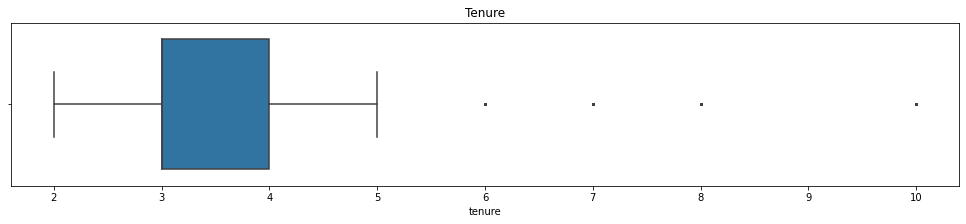

In [11]:
# check outliers in `tenure`
plt.figure(figsize=(17,3))
plt.title('Tenure')
sns.boxplot(data=None, x=df['tenure'], fliersize=1);

In [12]:
# determine the number of rows containing outliers
# calculate the 25th percentile value in `tenure`
percentile25 = df['tenure'].quantile(0.25)

# calculate the 75th percentile value in `tenure`
percentile75 = df['tenure'].quantile(0.75)

# calculate the interquartile range in `tenure`
iqr = percentile75 - percentile25

# define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(f"Lower limit: {lower_limit}")
print(f"Upper limit: {upper_limit}")

# identify subset of data containing outliers in `tenure`
outliers = df[(df['tenure'] > upper_limit) | (df['tenure'] < lower_limit)]

# count how many rows in the data contain outliers in `tenure`
print(f"Number of rows in the data containing outliers in `tenure`: {len(outliers)}")

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


***

# P*A*CE: Analyze

### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?

***

## 3. Exploratory Data Analysis

Let's begin by understanding how many employees left and what percentage of all employees this figure represents.

`0` represents the employees that stayed, and `1` represents those who have left

In [13]:
# get numbers of people who left vs stayed
print(df['left'].value_counts())

# get percentages of people who left vs stayed
print(df['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### 3.1 Comparison of Leavers by Monthly Hours and Number of Projects

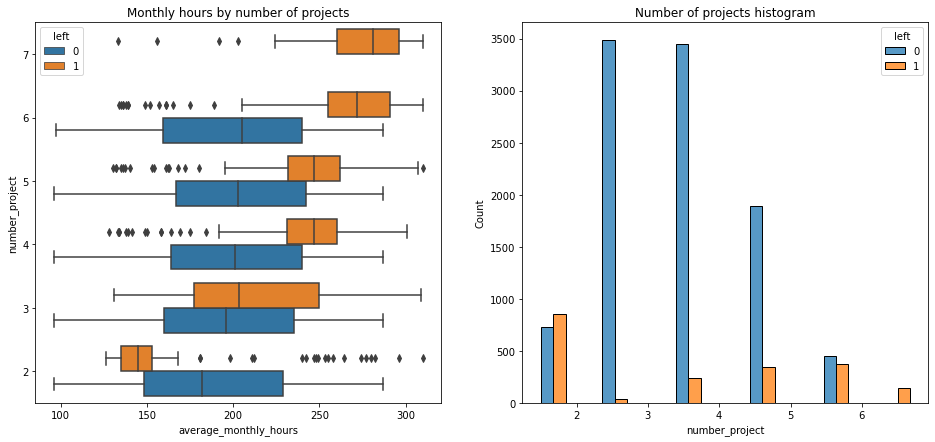

In [14]:
# set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (16,7))

# create boxplot
sns.boxplot(data=df, 
            x='average_monthly_hours', 
            y='number_project', 
            hue='left', 
            orient="h", 
            ax=ax[0])


# create histogram 
tenure_stay = df[df['left']==0]['number_project']
tenure_left = df[df['left']==1]['number_project']
sns.histplot(data=df, 
             x='number_project', 
             hue='left', 
             multiple='dodge', 
             shrink=2, 
             ax=ax[1])

# set axes and titles
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects')
ax[1].set_title('Number of projects histogram')

# show plots
plt.show()

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot:

1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects. 

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/week&mdash;much more than any other group. 

3. The optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.

Let's confirm that all employees with seven projects left.

In [15]:
# get value counts of stayed vs left for employees with 7 projects
df[df['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

This confirms that all employees with 7 projects did leave. 

### 3.2 Leavers by Monthly Hours and Satisfaction Level

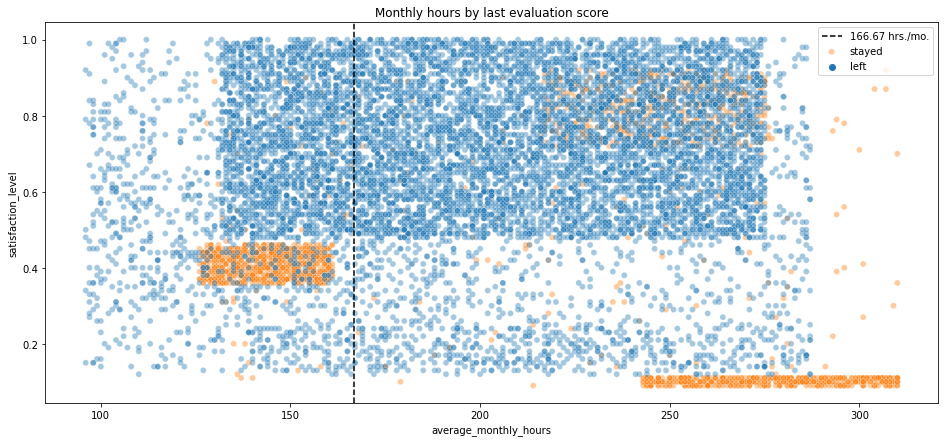

In [16]:
# create scatterplot
plt.figure(figsize=(16, 7))
sns.scatterplot(data=df, 
                x='average_monthly_hours', 
                y='satisfaction_level', 
                hue='left', 
                alpha=0.4)

plt.axvline(x=166.67, color='black', label='166.67 hrs./mo.', ls='--')

plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])
plt.title('Monthly hours by last evaluation score');

The scatterplot above shows that there was a sizeable group of employees who worked ~240&ndash;315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero. 

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels. 

Finally, there is a group who worked ~210&ndash;280 hours per month, and they had satisfaction levels ranging ~0.7&ndash;0.9. 

### 3.3 Leavers by Satisfaction Level and Tenure

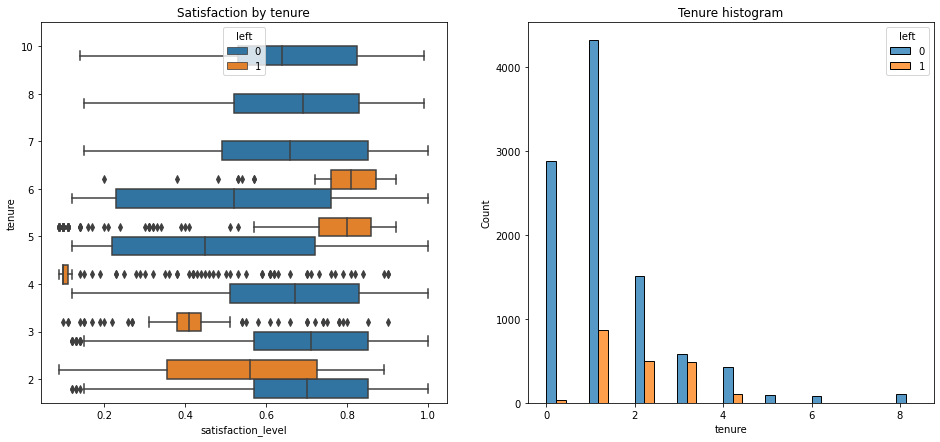

In [17]:
# set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (16,7))

# create boxplot
sns.boxplot(data=df, 
            x='satisfaction_level', 
            y='tenure', 
            hue='left', 
            orient="h", 
            ax=ax[0])


# create histogram
tenure_stay = df[df['left']==0]['tenure']
tenure_left = df[df['left']==1]['tenure']
sns.histplot(data=df, 
             x='tenure', 
             hue='left', 
             multiple='dodge', 
             shrink=5,
             ax=ax[1])

ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure')
ax[1].set_title('Tenure histogram')

plt.show();

There are many observations we can make from this plot:
- From the box plot, we can see that employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible. 
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed. 
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

Let's calculate the mean and median satisfaction scores of employees who left and those who didn't.

In [18]:
# calculate mean and median satisfaction scores of employees who left vs those who stayed
df.groupby(['left'])['satisfaction_level'] \
  .agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left. 

### 3.4 Comparison of Tenure and Salary

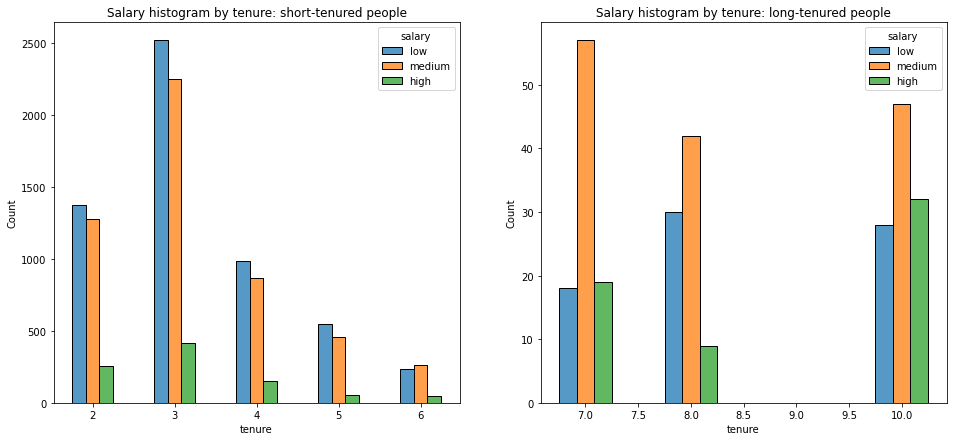

In [19]:
# set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (16,7))

# define short-tenured employees
tenure_short = df[df['tenure'] < 7]

# define long-tenured employees
tenure_long = df[df['tenure'] > 6]

# plot short-tenured histogram
sns.histplot(data=tenure_short, 
             x='tenure', 
             hue='salary', 
             discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])


# plot long-tenured histogram
sns.histplot(data=tenure_long, 
             x='tenure', 
             hue='salary', 
             discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[1])

ax[0].set_title('Salary histogram by tenure: short-tenured people')
ax[1].set_title('Salary histogram by tenure: long-tenured people');

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees. 

### 3.5  Leavers by Monthly Hours and Last Evaluation Score

Next, let's explore whether there's a correlation between working long hours and receiving high evaluation scores. Let's create a scatterplot of `average_monthly_hours` versus `last_evaluation`.

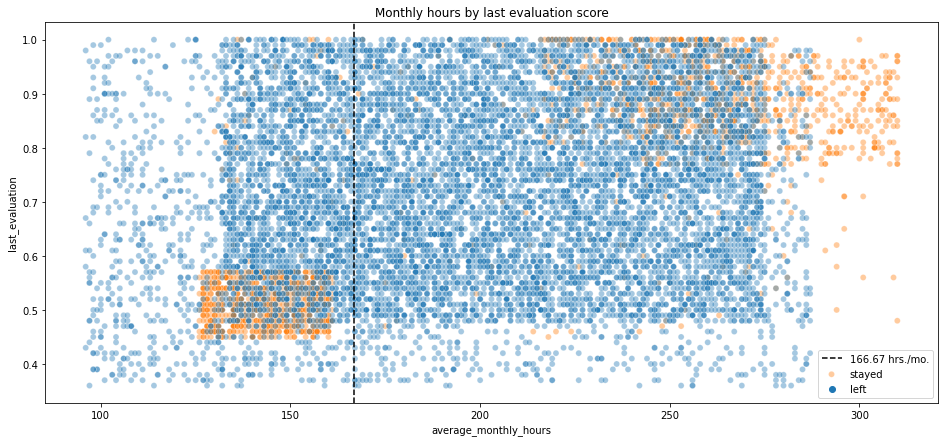

In [20]:
# create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16,7))

sns.scatterplot(data=df, 
                x='average_monthly_hours', 
                y='last_evaluation', 
                hue='left', 
                alpha=0.4)

plt.axvline(x=166.67, color='black', label='166.67 hrs./mo.', ls='--')

plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])
plt.title('Monthly hours by last evaluation score');

The following observations can be made from the scatterplot above:
- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores. 
- There seems to be a correlation between hours worked and evaluation score. 
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

### 3.6 Leavers by Monthly Hours and Last Promotion

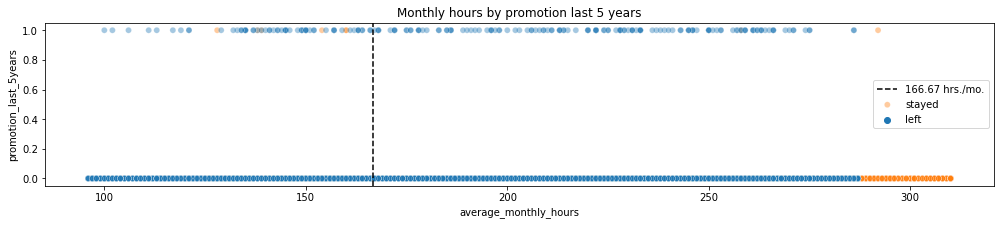

In [21]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(17, 3))
sns.scatterplot(data=df, 
                x='average_monthly_hours', 
                y='promotion_last_5years', 
                hue='left', alpha=0.4)

plt.axvline(x=166.67, color='black', ls='--')

plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])
plt.title('Monthly hours by promotion last 5 years');

The plot above shows the following:
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- many of the employees who left were working the longest hours without promotions within the last 5 years

### 3.7 Leavers by Department

In [22]:
# display counts for each department
df["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

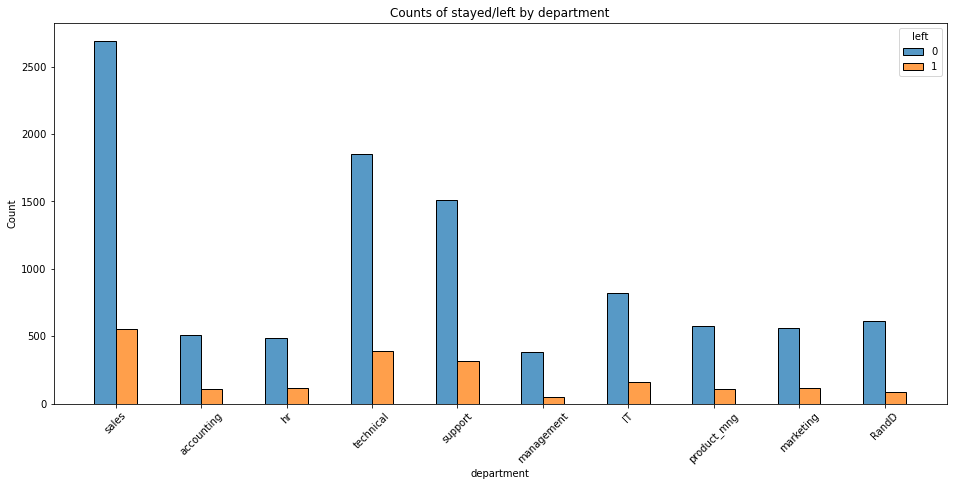

In [23]:
# create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(16,7))

sns.histplot(data=df, 
             x='department', 
             hue='left', 
             discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)

plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department');

There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed. 

### 3.8 Correlation Heatmap
Lastly, let's check for strong correlations between variables in the data.

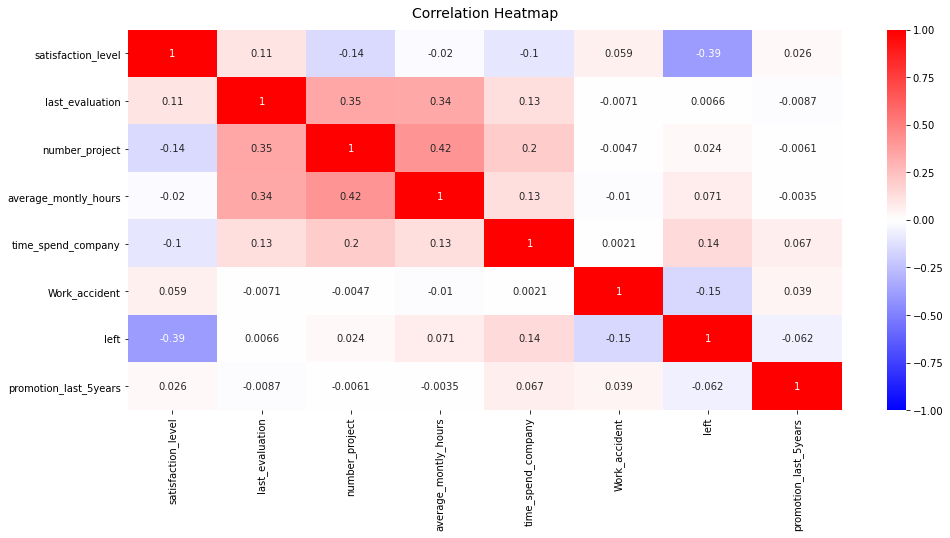

In [24]:
# plot a correlation heatmap
plt.figure(figsize=(16, 7))

heatmap = sns.heatmap(df0.corr(), 
                      vmin=-1, 
                      vmax=1, 
                      annot=True, 
                      cmap='bwr')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap confirms positive correlations between the number of projects, monthly hours, and evaluation scores, and negative correlation between whether an employee leaves and their satisfaction level.

### Summary

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 

***

# PA*C*E: Construct
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

### Identify the type of prediction task.

Our goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable `left` can be either 1 (indicating employee left) or 0 (indicating employee didn't leave).

### Identify the types of models most appropriate for this task.
Since the variable you want to predict (whether an employee leaves the company) is categorical, you could either build a Logistic Regression model, or a Tree-based Machine Learning model.

So you could proceed with one of the two following approaches. Or, if you'd like, you could implement both and determine how they compare.

***

## 4. Logistic Regression Model
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

Binomial logistic regression suits the task because it involves binary classification.

Before splitting the data, 

### 4.1 Prepare Data
Start by encoding non-numeric variables. There are two: `department` and `salary`. 

`department` is a categorical variable, which means we can dummy it for modeling. 

`salary` is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0&ndash;2.

In [25]:
#  make a copy of the dataframe
df_encoded = df.copy()

# encode `salary` column as an ordinal numeric category
df_encoded['salary'] = df_encoded['salary'].astype('category') \
                                           .cat.set_categories(['low', 'medium', 'high']) \
                                           .cat.codes

# encode `department` column with dummy variable
df_encoded = pd.get_dummies(df_encoded, drop_first=False)

# show dataframe
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Next, plot a correlation heatmap of the numerical variables. We will use this heatmap to identify which variables we want to focus on in our model.

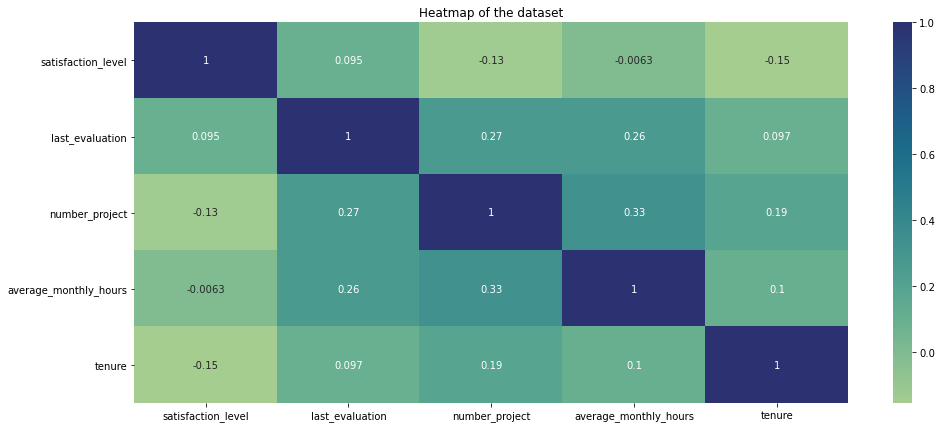

In [26]:
# plot correlation heatmap of variables
plt.figure(figsize=(16, 7))

sns.heatmap(df_encoded[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")

plt.title('Heatmap of the dataset')
plt.show()

Since logistic regression is quite sensitive to outliers, let's remove the outliers in `tenure` that were identified earlier.

In [27]:
# select only data where `tenure` is within interquartile range to use for logreg
df_logreg = df_encoded[(df_encoded['tenure'] >= lower_limit) & (df_encoded['tenure'] <= upper_limit)]

# show dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Now that our data has been processed, we can create assign our independent and dependent variables.

In [28]:
# define variables
# define independent variables (features)
X = df_logreg.drop('left', axis=1)

# define dependent variable
y = df_logreg['left']

In [29]:
# check X data
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [30]:
# check y data
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

Before we move on, let's check the class balance in the data. Since this is a binary classification task, the class balance informs the way we will split the data and interpret accuracy metrics.

In [36]:
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

There is an approximately 83/17 split between the employees who stayed and the employees who left. The data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, we might resample the data to make it more balanced. 

In this case, we can use this data as is, without modifying the class balance. However, we will stratify the training and testing data to ensure that this class balance is maintained in both the training and testing sets.

Finally, split the data into training and testing sets.

In [38]:
# split the data into training set and testing set with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

### 4.2 Build Logistic Regression Model

We can proceed to build the logistic regression model.

In [39]:
# fit training data to logreg model
logreg_clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)

In [40]:
# get predictions from test set
y_pred = logreg_clf.predict(X_test)

### 4.3 Evaluate Model Performance
To evaluate the performance of our logistic regression model, we will use a confusion matrix and the metrics: precision, recall, f1 and accuracy. The metrics will be presented in the form of a classification report.

First, create the confusion matrix with the `confusion_matrix()` function, and plot it to the console.

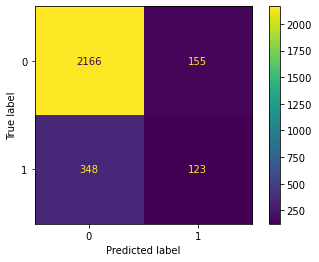

In [41]:
# calculate values for confusion matrix
logreg_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# create plot of confusion matrix
ConfusionMatrixDisplay(confusion_matrix=logreg_cm, display_labels=log_clf.classes_).plot(values_format='')

# show plot
plt.show()

The upper-left quadrant displays the number of true negatives.\
The upper-right quadrant displays the number of false positives.\
The bottom-left quadrant displays the number of false negatives.\
The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.\
False positives: The number of people who did not leave the model inaccurately predicted as leaving.\
False negatives: The number of people who left that the model inaccurately predicted did not leave\
True positives: The number of people who left the model accurately predicted as leaving

Then, create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [43]:
# classification report for logreg model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



From the classification report we can see that the logistic regression model achieved the following weighted average scores: 
- Precision: 79%
- Recall: 82%
- F1: 80%
- Accuracy: 82%

## 5. Decision Tree Model

### 5.1 Prepare Data
As we have already prepared the data and encoded our relevant variables for the logistic regression model above, we will use the encoded data from before and go straight to defining our independent and dependent variables.

Decision trees are a lot less sensitive to outliers compared to logistic regression so we have no need to remove outliers. We will use the original encoded data `df_encoded` instead of `df_logreg` which had outliers removed for logistic regression.

In [47]:
# define variables
# define independent variables (features)
X = df_encoded.drop('left', axis=1)

# define dependent variable
y = df_encoded['left']

In [49]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

### 5.2 Build the Model

In [50]:
# instantiate model
model = DecisionTreeClassifier(random_state=42)

# define hyperparameters
hyperparameters = {'max_depth':[4, 6, 8, None],
                   'min_samples_leaf': [2, 5, 1],
                   'min_samples_split': [2, 4, 6]}

# define scoring metrics
metrics = {'precision', 'recall', 'accuracy', 'f1', 'roc_auc'}

# instantiate gridsearch
tree = GridSearchCV(model, hyperparameters, scoring=metrics, cv=5, refit='roc_auc')

In [51]:
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'recall', 'roc_auc', 'f1', 'accuracy', 'precision'})

In [52]:
# Check best parameters
tree.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [53]:
# Check best AUC score on CV
tree.best_score_

0.9735924064555228

In [73]:
# get mean metric scores for the best validation fold

metric_dict = {'precision': 'mean_test_precision',
               'recall': 'mean_test_recall',
               'accuracy': 'mean_test_accuracy',
               'f1': 'mean_test_f1',
               'auc': 'mean_test_roc_auc'}

# df of all cv results
cv_results = pd.DataFrame(tree.cv_results_)

# row with max metric score
best_estimator_results = cv_results.iloc[cv_results[metric_dict['auc']].idxmax(), :]

# get metrics from row
precision = best_estimator_results.mean_test_precision
recall = best_estimator_results.mean_test_recall
accuracy = best_estimator_results.mean_test_accuracy
f1 = best_estimator_results.mean_test_f1
auc = best_estimator_results.mean_test_roc_auc
  
# create table of results
result = pd.DataFrame()
result = pd.DataFrame({'model': ['decision tree cv'],
                       'precision': [precision],
                       'recall': [recall],
                       'accuracy': [accuracy],
                       'F1': [f1],
                       'auc': [auc]})
  
result

,model,precision,recall,accuracy,F1,auc
0,decision tree cv,0.966122,0.916262,0.980762,0.940488,0.973592


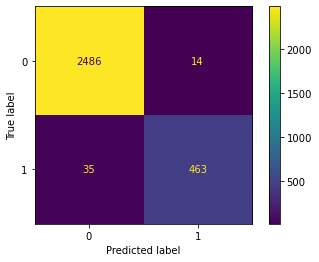

In [58]:
# Generate array of values for confusion matrix
preds = tree.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=tree.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=tree.classes_)
disp.plot(values_format='');

The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.

For exploratory purpose, you might want to inspect the splits of the decision tree model and the most important features in the random forest model.

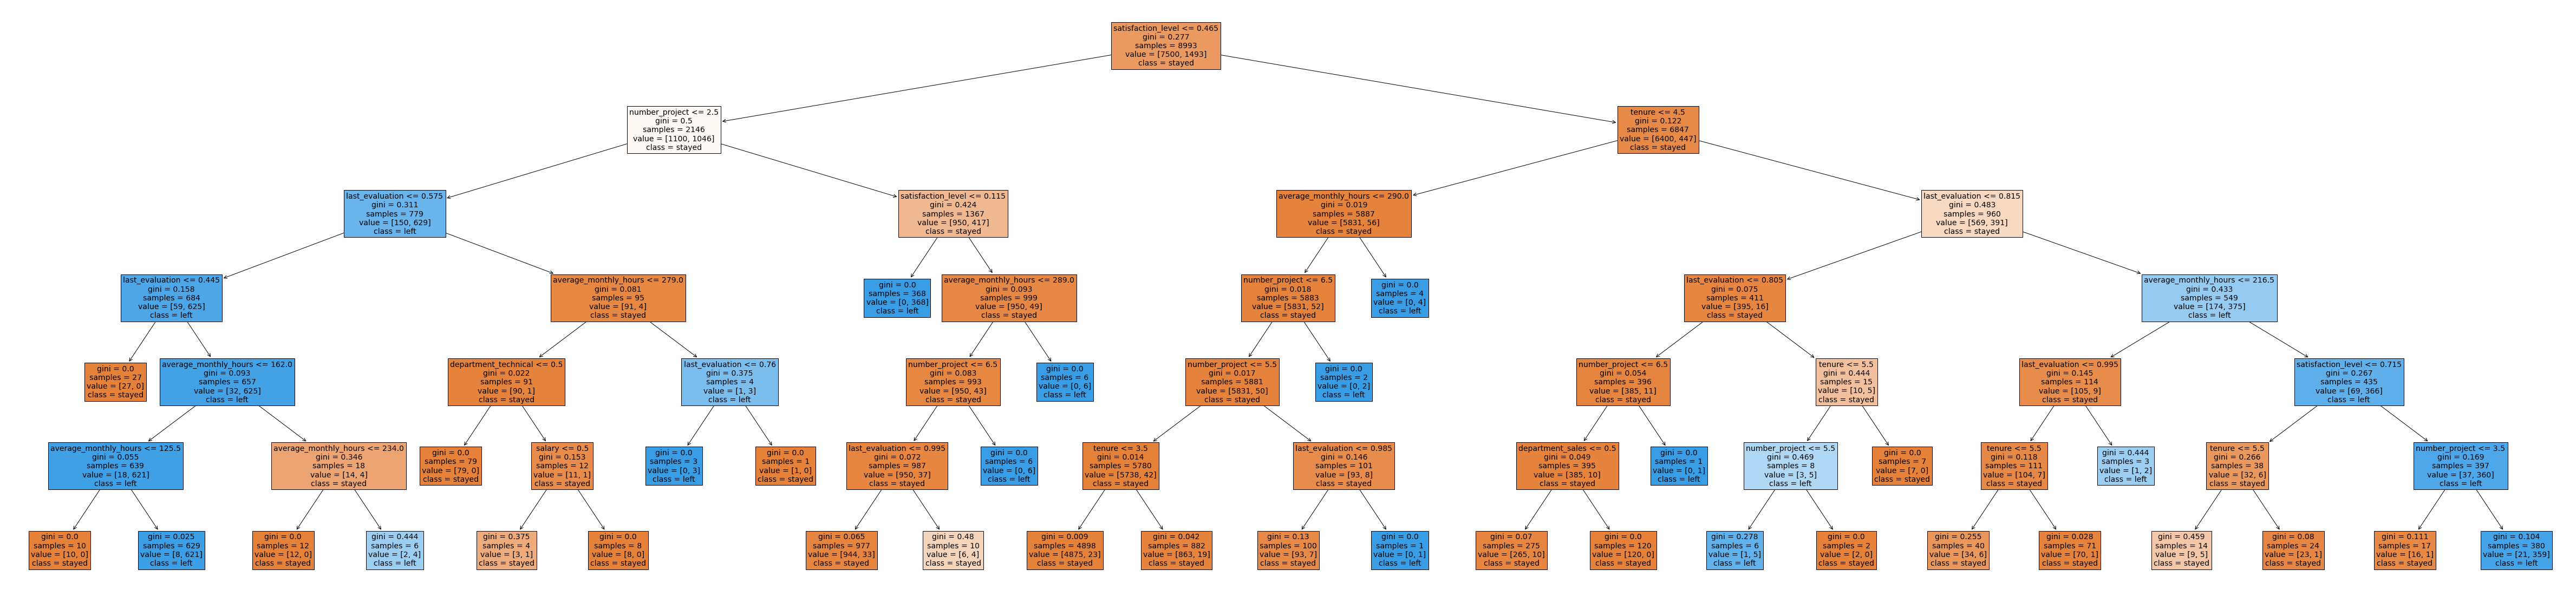

In [69]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [71]:

tree_importance = pd.DataFrame(tree.best_estimator_.feature_importances_, 
                               columns=['gini_importance'],
                               index=X.columns)

tree_importance = tree_importance.sort_values(by='gini_importance', ascending=False)

# select features with gini_importances > 0
tree_importance = tree_importance[tree_importance['gini_importance'] != 0]
tree_importance

,gini_importance
satisfaction_level,0.498610
last_evaluation,0.170803
number_project,0.133261
tenure,0.120307
average_monthly_hours,0.076705
salary,0.000150
department_sales,0.000099
department_technical,0.000065


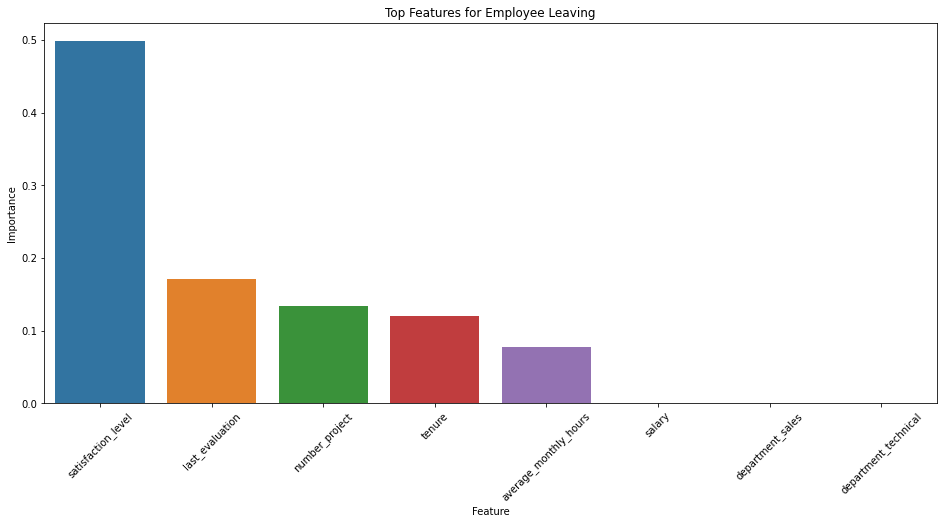

In [62]:
plt.figure(figsize=(16,7))

plt.xticks(rotation='45')

sns.barplot(data=tree_importance, 
            y="gini_importance", 
            x=tree_importances.index, 
            orient='v')

plt.xticks(rotation='45')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top Features for Employee Leaving")

plt.show()


The barplot above shows that in this decision tree model, `satisfaction_level`, `last_evaluation`, `number_project`, and `tenure` have the highest importance, in that order. These variables will be the most helpful in predicting the outcome variable, `left`.

***

# PAC*E*: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



***

## 6. Evaluation and Selection of Models
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set. The random forest modestly outperformed the decision tree model. 

## 7. Recommendations and Conclusions

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score. 

Could try ensemble learning to boost prediction accuracy of the decision tree. We may also want to explore this data with a K-means model and analyzing the clusters. This may yield valuable insight. 